# Lecture 04       

## Pandas [Basics](#Basics)
                                       
## Introduction To [Data-munging](#Munging)
                                       
   - Add new manipulated variables     
   - Separate char to new variables    
   - Convert variables to numeric or factor               
   - Some string manipulations         
   - Rename variables                  
   - Filter out different observations 
     - conditional selection           
     - tabulate frequency of a var     
     - missing values                  
     - replace values                  
     - duplicates                      
   - Using pipes                
   - Sorting data                      
                                       
#### Case-study 

- Based on: Chapter 02, A:              
    - Finding a good deal among hotels: data preparation              
                                      
#### Dataset:                              
- hotels-europe 
---

## Pandas Basics

[Pandas](#https://pandas.pydata.org/) is the most popular data container in Python for data manipulation and analysis. Pandas has two primary data structures: `Series` and `DataFrames`. Series are similar to Python lists or numpy vectors: they are one dimensional. They are more flexible asy can contain mixed types! A Series object  also has an index which is printed along the values when it goes _toString_. Pandas Series are the main building blocks of the Pandas DataFrames.

In [5]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [6]:
ps = pd.Series(['a', 2, np.pi, 36])
print(ps)

0          a
1          2
2    3.14159
3         36
dtype: object


In [7]:
# values only
print(ps.values)

['a' 2 3.141592653589793 36]


In [8]:
# indices only
print(ps.index)

RangeIndex(start=0, stop=4, step=1)


We can use the list slicing indices to acces data...

In [9]:
print(ps[1:3])

1          2
2    3.14159
dtype: object


There are two other syntax options for data access:
- `.loc[]` provides access using the _index values_
- `iloc[]` uses the index positions

In [10]:
ps = pd.Series(
    data = ['mozzarella caprese',  'Wiener Schnitzel', 'Schwartwalder Kirschtorte', 'lemonade', 'whiskey'], 
    index = ['appetizer', 'main course', 'dessert', 'beverage', 'alcohol']
)

In [11]:
ps

appetizer             mozzarella caprese
main course             Wiener Schnitzel
dessert        Schwartwalder Kirschtorte
beverage                        lemonade
alcohol                          whiskey
dtype: object

In [12]:
ps.loc[['appetizer', 'dessert', 'beverage']]

appetizer           mozzarella caprese
dessert      Schwartwalder Kirschtorte
beverage                      lemonade
dtype: object

In [13]:
ps.iloc[1:3]

main course             Wiener Schnitzel
dessert        Schwartwalder Kirschtorte
dtype: object

DataFrames are 'two-dimensional, size-mutable, potentially heterogeneous tabular data'. Each DataFrame is eventually a collection of Pandas Series.

There are mupltiple ways to create Pandas dataframes.

In [14]:
dc_city_pop = {
    'Tokyo': 37339804,
    'Delhi': 31181376,
    'Shanghai': 27795702,
    'Sao Paulo': 22237472,
    'Mexico City': 21918936,
    'Dhaka': 21741090,
    'Cairo': 21322750,
    'Beijing': 20896820,
    'Mumbai': 20667656,
    'Osaka': 19110616
}

Note: population numbers are from [2018](https://www.archdaily.com/906605/the-20-largest-cities-in-the-world-of-2018).

In [15]:
ps_city_pop = pd.Series(dc_city_pop)
ps_city_pop

Tokyo          37339804
Delhi          31181376
Shanghai       27795702
Sao Paulo      22237472
Mexico City    21918936
Dhaka          21741090
Cairo          21322750
Beijing        20896820
Mumbai         20667656
Osaka          19110616
dtype: int64

In [16]:
print(ps_city_pop.index)
print(ps_city_pop.values)

Index(['Tokyo', 'Delhi', 'Shanghai', 'Sao Paulo', 'Mexico City', 'Dhaka',
       'Cairo', 'Beijing', 'Mumbai', 'Osaka'],
      dtype='object')
[37339804 31181376 27795702 22237472 21918936 21741090 21322750 20896820
 20667656 19110616]


In [17]:
dc_city_countries = {
    'Tokyo': 'Japan',
    'Delhi': 'India',
    'Shanghai': 'China',
    'Sao Paulo': 'Brazil',
    'Mexico City': 'Mexico',
    'Dhaka': 'Bangladesh',
    'Cairo': 'Egypt',
    'Beijing': 'China',
    'Mumbai': 'India',
    'Osaka': 'Japan'
}

In [18]:
ps_city_countries = pd.Series(dc_city_countries)
ps_city_countries

Tokyo               Japan
Delhi               India
Shanghai            China
Sao Paulo          Brazil
Mexico City        Mexico
Dhaka          Bangladesh
Cairo               Egypt
Beijing             China
Mumbai              India
Osaka               Japan
dtype: object

In [19]:
print(ps_city_countries.index)
print(ps_city_countries.values)

Index(['Tokyo', 'Delhi', 'Shanghai', 'Sao Paulo', 'Mexico City', 'Dhaka',
       'Cairo', 'Beijing', 'Mumbai', 'Osaka'],
      dtype='object')
['Japan' 'India' 'China' 'Brazil' 'Mexico' 'Bangladesh' 'Egypt' 'China'
 'India' 'Japan']


In [20]:
df_cities = pd.concat([ps_city_pop, ps_city_countries], axis = 1)
df_cities

,0,1
Tokyo,37339804,Japan
Delhi,31181376,India
Shanghai,27795702,China
Sao Paulo,22237472,Brazil
Mexico City,21918936,Mexico
Dhaka,21741090,Bangladesh
Cairo,21322750,Egypt
Beijing,20896820,China
Mumbai,20667656,India
Osaka,19110616,Japan


In [21]:
df_cities.columns = ['population', 'country']
df_cities

,population,country
Tokyo,37339804,Japan
Delhi,31181376,India
Shanghai,27795702,China
Sao Paulo,22237472,Brazil
Mexico City,21918936,Mexico
Dhaka,21741090,Bangladesh
Cairo,21322750,Egypt
Beijing,20896820,China
Mumbai,20667656,India
Osaka,19110616,Japan


<br>Slicing based on index and/or column.
- using `.iloc[]` based on position

In [30]:
# some rows
df_cities.iloc[2:5]

,population,country
Shanghai,27795702,China
Sao Paulo,22237472,Brazil
Mexico City,21918936,Mexico


In [23]:
# some rows and some columns
df_cities.iloc[2:5, 1]

Shanghai        China
Sao Paulo      Brazil
Mexico City    Mexico
Name: country, dtype: object

- using `.loc[]` based on the index value and/or column name

In [28]:
# list of cities (note the double squared brackets)
df_cities.loc[['Shanghai', 'Dhaka', 'Osaka']]

,population,country
Shanghai,27795702,China
Dhaka,21741090,Bangladesh
Osaka,19110616,Japan


In [41]:
# list of cities + a column
df_cities.loc[['Shanghai', 'Dhaka', 'Osaka'], 'country']

Shanghai         China
Dhaka       Bangladesh
Osaka            Japan
Name: country, dtype: object

In [29]:
# a range of cities from the index
df_cities.loc['Tokyo':'Sao Paulo']

,population,country
Tokyo,37339804,Japan
Delhi,31181376,India
Shanghai,27795702,China
Sao Paulo,22237472,Brazil


- sicing/filtering based on cell value

In [42]:
df_cities[df_cities.population > 30_000_000] # for human readibility you can use underscore as thousand separator

,population,country
Tokyo,37339804,Japan
Delhi,31181376,India


In [35]:
df_cities[df_cities.country.isin(['Japan', 'India', 'Brazil'])]

,population,country
Tokyo,37339804,Japan
Delhi,31181376,India
Sao Paulo,22237472,Brazil
Mumbai,20667656,India
Osaka,19110616,Japan


In [37]:
df_cities[~df_cities.country.isin(['Japan', 'India', 'Brazil'])] # tilde (~) for 'not in' 

,population,country
Shanghai,27795702,China
Mexico City,21918936,Mexico
Dhaka,21741090,Bangladesh
Cairo,21322750,Egypt
Beijing,20896820,China


<br>Move index to column

In [20]:
df_cities.reset_index(drop = False, inplace = True)
df_cities

,index,population,country
0,Tokyo,37339804,Japan
1,Delhi,31181376,India
2,Shanghai,27795702,China
3,Sao Paulo,22237472,Brazil
4,Mexico City,21918936,Mexico
5,Dhaka,21741090,Bangladesh
6,Cairo,21322750,Egypt
7,Beijing,20896820,China
8,Mumbai,20667656,India
9,Osaka,19110616,Japan


<br>You can rename certain columns using a dictionary with _old name_ as key and _new name_ as value.

In [21]:
df_cities.rename( {'index': 'city'}, axis = 'columns', inplace = True)
df_cities

,city,population,country
0,Tokyo,37339804,Japan
1,Delhi,31181376,India
2,Shanghai,27795702,China
3,Sao Paulo,22237472,Brazil
4,Mexico City,21918936,Mexico
5,Dhaka,21741090,Bangladesh
6,Cairo,21322750,Egypt
7,Beijing,20896820,China
8,Mumbai,20667656,India
9,Osaka,19110616,Japan


We can also create a dataframe from a list of lists.

In [44]:
data = []
data.append([ 'Tokyo' , 37339804 , 'Japan' ])
data.append([ 'Delhi' , 31181376 , 'India' ])
data.append([ 'Shanghai' , 27795702 , 'China' ])
data.append([ 'Sao Paulo' , 22237472 , 'Brazil' ])
data.append([ 'Mexico City' , 21918936 , 'Mexico' ])
data.append([ 'Dhaka' , 21741090 , 'Bangladesh' ])
data.append([ 'Cairo' , 21322750 , 'Egypt' ])
data.append([ 'Beijing' , 20896820 , 'China' ])
data.append([ 'Mumbai' , 20667656 , 'India' ])
data.append([ 'Osaka' , 19110616 , 'Japan' ])

In [45]:
data

[['Tokyo', 37339804, 'Japan'],
 ['Delhi', 31181376, 'India'],
 ['Shanghai', 27795702, 'China'],
 ['Sao Paulo', 22237472, 'Brazil'],
 ['Mexico City', 21918936, 'Mexico'],
 ['Dhaka', 21741090, 'Bangladesh'],
 ['Cairo', 21322750, 'Egypt'],
 ['Beijing', 20896820, 'China'],
 ['Mumbai', 20667656, 'India'],
 ['Osaka', 19110616, 'Japan']]

In [46]:
df_cities_ = pd.DataFrame(data = data, columns = ['city', 'population', 'country'])
df_cities_

,city,population,country
0,Tokyo,37339804,Japan
1,Delhi,31181376,India
2,Shanghai,27795702,China
3,Sao Paulo,22237472,Brazil
4,Mexico City,21918936,Mexico
5,Dhaka,21741090,Bangladesh
6,Cairo,21322750,Egypt
7,Beijing,20896820,China
8,Mumbai,20667656,India
9,Osaka,19110616,Japan


Reorder columns 

In [48]:
df_cities_ = df_cities_[['city', 'country', 'population']]
df_cities_

,city,country,population
0,Tokyo,Japan,37339804
1,Delhi,India,31181376
2,Shanghai,China,27795702
3,Sao Paulo,Brazil,22237472
4,Mexico City,Mexico,21918936
5,Dhaka,Bangladesh,21741090
6,Cairo,Egypt,21322750
7,Beijing,China,20896820
8,Mumbai,India,20667656
9,Osaka,Japan,19110616


Metadata on the dataframe colums

In [25]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
city          10 non-null object
population    10 non-null int64
country       10 non-null object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [39]:
df_cities.shape # results in a tuple

(10, 2)

In [40]:
df_cities.shape[0] # rowcount

10

## Introduction To Data-munging<a class = 'anchor' id = 'Munging'></a>

Import raw data

In [26]:
raw_df = pd.read_csv("https://osf.io/yzntm/download")

Have a look at the data

In [27]:
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


### 1) Adding a new variable

Let us add nnights variable, which shows the number of nights spent in the hotel\
As the data was collected in such way, it is 1 for each observations.

You can assign a new variable using the following syntax

In [28]:
raw_df["nnights"] = 1

Or use the `assign` function of pandas and also create a new variable, lets call it `df`

In [29]:
df = raw_df.assign(nnights = 1)

Lets remove the raw data

In [30]:
del raw_df

### 2) Data cleaning - selecting a variable

You can select variables with `[]` brackets after the DataFrame object

In [31]:
df[["accommodationtype" , "price"]]

,accommodationtype,price
0,_ACCOM_TYPE@Hotel,172
1,_ACCOM_TYPE@Hotel,122
2,_ACCOM_TYPE@Hotel,122
3,_ACCOM_TYPE@Hotel,552
4,_ACCOM_TYPE@Hotel,122
5,_ACCOM_TYPE@Hotel,114
6,_ACCOM_TYPE@Hostel,119
7,_ACCOM_TYPE@Hostel,119
8,_ACCOM_TYPE@Hostel,547
9,_ACCOM_TYPE@Hotel,118


Or use the `filter` function

In [32]:
df.filter(["accommodationtype" , "price"])

,accommodationtype,price
0,_ACCOM_TYPE@Hotel,172
1,_ACCOM_TYPE@Hotel,122
2,_ACCOM_TYPE@Hotel,122
3,_ACCOM_TYPE@Hotel,552
4,_ACCOM_TYPE@Hotel,122
5,_ACCOM_TYPE@Hotel,114
6,_ACCOM_TYPE@Hostel,119
7,_ACCOM_TYPE@Hostel,119
8,_ACCOM_TYPE@Hostel,547
9,_ACCOM_TYPE@Hotel,118


You can also select columns with `filter` using Regular Expressions aka regex

In [33]:
df.filter(regex="rating")

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating
0,1030.0,4.0,4.0,1115.0,4.3 /5
1,1030.0,4.0,4.0,1115.0,4.3 /5
2,1030.0,4.0,4.0,1115.0,4.3 /5
3,1030.0,4.0,4.0,1115.0,4.3 /5
4,1030.0,4.0,4.0,1115.0,4.3 /5
5,1030.0,4.0,4.0,1115.0,4.3 /5
6,372.0,2.0,4.0,999.0,4.1 /5
7,372.0,2.0,4.0,999.0,4.1 /5
8,372.0,2.0,4.0,999.0,4.1 /5
9,165.0,4.0,4.0,674.0,4.1 /5


### 3) separating character vector with a unique sign 

 Check accomotationtype: it is a character with a clear separator "@"

 To clean accommodationtype column: separate the characters at @ 
   and create two new variables: "garbage" and "acc_type".
 garbage will contain all characters before @ sign and acc_type will take everything after!

In [34]:
df["accommodationtype"]

0             _ACCOM_TYPE@Hotel
1             _ACCOM_TYPE@Hotel
2             _ACCOM_TYPE@Hotel
3             _ACCOM_TYPE@Hotel
4             _ACCOM_TYPE@Hotel
5             _ACCOM_TYPE@Hotel
6            _ACCOM_TYPE@Hostel
7            _ACCOM_TYPE@Hostel
8            _ACCOM_TYPE@Hostel
9             _ACCOM_TYPE@Hotel
10            _ACCOM_TYPE@Hotel
11            _ACCOM_TYPE@Hotel
12            _ACCOM_TYPE@Hotel
13            _ACCOM_TYPE@Hotel
14            _ACCOM_TYPE@Hotel
15            _ACCOM_TYPE@Hotel
16            _ACCOM_TYPE@Hotel
17            _ACCOM_TYPE@Hotel
18            _ACCOM_TYPE@Hotel
19            _ACCOM_TYPE@Hotel
20            _ACCOM_TYPE@Hotel
21            _ACCOM_TYPE@Hotel
22            _ACCOM_TYPE@Hotel
23            _ACCOM_TYPE@Hotel
24            _ACCOM_TYPE@Hotel
25            _ACCOM_TYPE@Hotel
26            _ACCOM_TYPE@Hotel
27            _ACCOM_TYPE@Hotel
28            _ACCOM_TYPE@Hotel
29            _ACCOM_TYPE@Hotel
                  ...          
149936  

You can easily split and strip character columns wiht pandas with attaching the `str` function after column name

In [35]:
df["accommodationtype"].str.split("@")

0             [_ACCOM_TYPE, Hotel]
1             [_ACCOM_TYPE, Hotel]
2             [_ACCOM_TYPE, Hotel]
3             [_ACCOM_TYPE, Hotel]
4             [_ACCOM_TYPE, Hotel]
5             [_ACCOM_TYPE, Hotel]
6            [_ACCOM_TYPE, Hostel]
7            [_ACCOM_TYPE, Hostel]
8            [_ACCOM_TYPE, Hostel]
9             [_ACCOM_TYPE, Hotel]
10            [_ACCOM_TYPE, Hotel]
11            [_ACCOM_TYPE, Hotel]
12            [_ACCOM_TYPE, Hotel]
13            [_ACCOM_TYPE, Hotel]
14            [_ACCOM_TYPE, Hotel]
15            [_ACCOM_TYPE, Hotel]
16            [_ACCOM_TYPE, Hotel]
17            [_ACCOM_TYPE, Hotel]
18            [_ACCOM_TYPE, Hotel]
19            [_ACCOM_TYPE, Hotel]
20            [_ACCOM_TYPE, Hotel]
21            [_ACCOM_TYPE, Hotel]
22            [_ACCOM_TYPE, Hotel]
23            [_ACCOM_TYPE, Hotel]
24            [_ACCOM_TYPE, Hotel]
25            [_ACCOM_TYPE, Hotel]
26            [_ACCOM_TYPE, Hotel]
27            [_ACCOM_TYPE, Hotel]
28            [_ACCO

This results in a Series of lists, each list contains the splitted parts of the original string. You can access the with the following syntax

In [36]:
df["accommodationtype"].str.split("@").str[0]

0         _ACCOM_TYPE
1         _ACCOM_TYPE
2         _ACCOM_TYPE
3         _ACCOM_TYPE
4         _ACCOM_TYPE
5         _ACCOM_TYPE
6         _ACCOM_TYPE
7         _ACCOM_TYPE
8         _ACCOM_TYPE
9         _ACCOM_TYPE
10        _ACCOM_TYPE
11        _ACCOM_TYPE
12        _ACCOM_TYPE
13        _ACCOM_TYPE
14        _ACCOM_TYPE
15        _ACCOM_TYPE
16        _ACCOM_TYPE
17        _ACCOM_TYPE
18        _ACCOM_TYPE
19        _ACCOM_TYPE
20        _ACCOM_TYPE
21        _ACCOM_TYPE
22        _ACCOM_TYPE
23        _ACCOM_TYPE
24        _ACCOM_TYPE
25        _ACCOM_TYPE
26        _ACCOM_TYPE
27        _ACCOM_TYPE
28        _ACCOM_TYPE
29        _ACCOM_TYPE
             ...     
149936    _ACCOM_TYPE
149937    _ACCOM_TYPE
149938    _ACCOM_TYPE
149939    _ACCOM_TYPE
149940    _ACCOM_TYPE
149941    _ACCOM_TYPE
149942    _ACCOM_TYPE
149943    _ACCOM_TYPE
149944    _ACCOM_TYPE
149945    _ACCOM_TYPE
149946    _ACCOM_TYPE
149947    _ACCOM_TYPE
149948    _ACCOM_TYPE
149949    _ACCOM_TYPE
149950    

In [37]:
df["accommodationtype"].str.split("@").str[1].str.strip()

0             Hotel
1             Hotel
2             Hotel
3             Hotel
4             Hotel
5             Hotel
6            Hostel
7            Hostel
8            Hostel
9             Hotel
10            Hotel
11            Hotel
12            Hotel
13            Hotel
14            Hotel
15            Hotel
16            Hotel
17            Hotel
18            Hotel
19            Hotel
20            Hotel
21            Hotel
22            Hotel
23            Hotel
24            Hotel
25            Hotel
26            Hotel
27            Hotel
28            Hotel
29            Hotel
            ...    
149936       Hostel
149937       Hostel
149938       Hostel
149939       Hostel
149940       Hostel
149941       Hostel
149942       Hostel
149943    Apartment
149944    Apartment
149945    Apartment
149946    Apartment
149947    Apartment
149948    Apartment
149949    Apartment
149950    Apartment
149951    Apartment
149952        Hotel
149953        Hotel
149954        Hotel


The second value in the lists contains the type of information about the accomodation type, lets create a new variable out of it.

In [38]:
df["acc_type"] = df["accommodationtype"].str.split("@").str[1].str.strip()
df["acc_type"].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
                           65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: acc_type, dtype: int64

Its a good idea to use the `strip` function when splitting string variables as it removes any unnecessary white space

### Task - creating a numeric vector w simple separation

  1) Correct the `guestreviewsrating` variable into simple numeric variable\
  2) Check with `.dtypes` method\
  3) Convert the variable into a numeric variable


In [39]:
df["guestreviewsrating"].value_counts(dropna=False)

4 /5      23160
3.7 /5    15031
4.5 /5    14952
4.3 /5    11268
4.1 /5    11190
3.5 /5    11145
NaN       10587
4.4 /5     9079
3.9 /5     8853
3.2 /5     6112
3 /5       4838
4.6 /5     4417
3.4 /5     3727
4.8 /5     3095
5 /5       2646
2.7 /5     2337
2.5 /5     1557
2.9 /5     1213
4.9 /5     1157
2.2 /5      976
2 /5        976
1 /5        679
2.4 /5      472
1.7 /5      143
1.8 /5      112
1.5 /5       91
1.6 /5       54
1.2 /5       48
1.3 /5       41
1.1 /5       10
Name: guestreviewsrating, dtype: int64

In [40]:
df["ratings"] = df["guestreviewsrating"].str.split('/').str[0].str.strip()
df["ratings"].dtypes

dtype('O')

In [41]:
df["ratings"] = df["ratings"].astype(float)

In [42]:
df["ratings"].dtypes

dtype('float64')

### Task

Create numerical variables from the two distance measures:

In [43]:
df[["center1distance", "center2distance"]]

,center1distance,center2distance
0,3.1 miles,3.6 miles
1,3.1 miles,3.6 miles
2,3.1 miles,3.6 miles
3,3.1 miles,3.6 miles
4,3.1 miles,3.6 miles
5,3.1 miles,3.6 miles
6,0.9 miles,0.8 miles
7,0.9 miles,0.8 miles
8,0.9 miles,0.8 miles
9,1.5 miles,1.4 miles


We have two numeric values than the format of the distance "miles"

In [44]:
df["distance"] = df["center1distance"].str.strip().str.split().str[0].astype(float)
df["distance_alter"] = df["center2distance"].str.strip().str.split().str[0].astype(float)

Check results

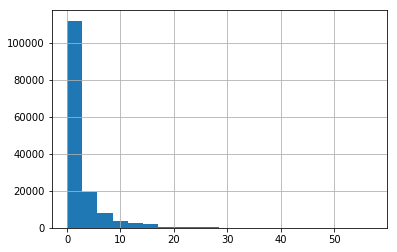

In [45]:
df["distance"].hist(bins=20)

### Rename variables

Using the `rename` function, you have to specify in a dictionary that which columns you want to rename and their new names

In [46]:
df.filter(regex="rating")

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating,ratings
0,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
1,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
2,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
3,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
4,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
5,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
6,372.0,2.0,4.0,999.0,4.1 /5,4.1
7,372.0,2.0,4.0,999.0,4.1 /5,4.1
8,372.0,2.0,4.0,999.0,4.1 /5,4.1
9,165.0,4.0,4.0,674.0,4.1 /5,4.1


In [47]:
df = df.rename(columns={"rating_reviewcount": "rating_count", "rating2_ta": "ratingta"})

In [48]:
df.filter(regex="rating")

,rating_count,starrating,ratingta,rating2_ta_reviewcount,guestreviewsrating,ratings
0,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
1,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
2,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
3,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
4,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
5,1030.0,4.0,4.0,1115.0,4.3 /5,4.3
6,372.0,2.0,4.0,999.0,4.1 /5,4.1
7,372.0,2.0,4.0,999.0,4.1 /5,4.1
8,372.0,2.0,4.0,999.0,4.1 /5,4.1
9,165.0,4.0,4.0,674.0,4.1 /5,4.1


### Task:
   
also rename the following variables as follows:
     
    rating2_ta_reviewcount: ratingta_count
    addresscountryname: "country
    starrating: stars
    s_city": city

In [49]:
df = df.rename(columns={
    "rating2_ta_reviewcount": "ratingta_count",
    "addresscountryname": "country",
    "starrating": "stars",
    "s_city": "city",
})

### Filtering observations

Use the `loc` function

In [50]:
df.shape

(149966, 29)

let us have only hotels

In [51]:
df.loc[df["acc_type"] == "Hotel"]

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6
5,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,114,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.3,3.1,3.6
9,Netherlands,Amsterdam,165.0,1.5 miles,City centre,1.4 miles,Montelbaanstoren,Amsterdam,118,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.1,1.5,1.4
10,Netherlands,Amsterdam,165.0,1.5 miles,City centre,1.4 miles,Montelbaanstoren,Amsterdam,217,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.1,1.5,1.4
11,Netherlands,Amsterdam,165.0,1.5 miles,City centre,1.4 miles,Montelbaanstoren,Amsterdam,114,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.1,1.5,1.4
12,Netherlands,Amsterdam,165.0,1.5 miles,City centre,1.4 miles,Montelbaanstoren,Amsterdam,737,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.1,1.5,1.4


Filtering: find missing values\
look at one of our key variable: ratings\
we can calculate the frequencies of the ratings


In [52]:
df["ratings"].isnull().sum()

10587

What can we do with the NA values?\
First check them with 'loc'


In [53]:
df.loc[df["ratings"].isnull()]

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
414,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,175,price for 1 night,...,15-50% offer,2018,6,1,0,1,Hotel,NaN,2.4,3.0
415,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,221,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,NaN,2.4,3.0
416,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,249,price for 1 night,...,15-50% offer,2018,4,1,0,1,Hotel,NaN,2.4,3.0
542,Netherlands,Amsterdam,NaN,4.7 miles,City centre,5.1 miles,Montelbaanstoren,Amsterdam West,1496,price for 4 nights,...,0% no offer,2017,12,0,1,1,Apartment,NaN,4.7,5.1
1059,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,232,price for 1 night,...,0% no offer,2018,6,1,0,1,Hotel,NaN,0.7,0.2
1060,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,176,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,NaN,0.7,0.2
1061,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,186,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,NaN,0.7,0.2
1062,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,800,price for 4 nights,...,15-50% offer,2017,12,0,1,1,Hotel,NaN,0.7,0.2
1063,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,252,price for 1 night,...,0% no offer,2018,4,1,0,1,Hotel,NaN,0.7,0.2
1064,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,272,price for 1 night,...,0% no offer,2018,5,1,0,1,Hotel,NaN,0.7,0.2


if reasonable we can drop them, but there needs to be good reason for that!


In [54]:
df = df.loc[df["ratings"].notnull()]

Or alternatively ose `dropna`

In [55]:
df = df.dropna(subset=["ratings"])

In [56]:
df

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,0% no offer,2017,11,1,0,1,Hotel,4.3,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,1,1,0,1,Hotel,4.3,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,1-15% offer,2017,12,0,1,1,Hotel,4.3,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,15-50% offer,2018,2,1,0,1,Hotel,4.3,3.1,3.6
5,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,114,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.3,3.1,3.6
6,Netherlands,Amsterdam,372.0,0.9 miles,City centre,0.8 miles,Montelbaanstoren,Amsterdam,119,price for 1 night,...,0% no offer,2017,11,0,0,1,Hostel,4.1,0.9,0.8
7,Netherlands,Amsterdam,372.0,0.9 miles,City centre,0.8 miles,Montelbaanstoren,Amsterdam,119,price for 1 night,...,0% no offer,2017,12,0,1,1,Hostel,4.1,0.9,0.8
8,Netherlands,Amsterdam,372.0,0.9 miles,City centre,0.8 miles,Montelbaanstoren,Amsterdam,547,price for 4 nights,...,0% no offer,2017,12,0,1,1,Hostel,4.1,0.9,0.8
9,Netherlands,Amsterdam,165.0,1.5 miles,City centre,1.4 miles,Montelbaanstoren,Amsterdam,118,price for 1 night,...,15-50% offer,2017,12,0,1,1,Hotel,4.1,1.5,1.4


### Correcting wrongly documented observations:
 In case of `stars` there are only values from 0-5

In [57]:
df["stars"].value_counts(dropna=False)

3.0    41692
4.0    38583
0.0    22451
2.0    13360
5.0     8346
3.5     7797
2.5     2940
1.0     2383
4.5     1661
1.5      166
Name: stars, dtype: int64

What does 0 star means? It is missing, but recorded as 0...\
We need to set these values to `None`: re-define the stars variable:

In [58]:
df["stars"] = np.where(df["stars"] == 0, None, df["stars"])

In [59]:
df["stars"].value_counts(dropna=False)

3.0    41692
4.0    38583
NaN    22451
2.0    13360
5.0     8346
3.5     7797
2.5     2940
1.0     2383
4.5     1661
1.5      166
Name: stars, dtype: int64

### Duplicates:

1.) exact match for each values for a given observations\
 
Count the number of duplicates

In [60]:
df.duplicated().sum()

1761

Remove them

In [61]:
df = df.drop_duplicates()

2.) Remove duplicates to specific variables, that are important to us

To make sense, let us take this into two steps: 

    a) select certain variables:


In [62]:
important_variables = [
    "country",
    "hotel_id",
    "distance",
    "stars",
    "ratings",
    "price",
    "year",
    "month",
    "weekend",
    "holiday",
]

 Now we can filter out only duplicates in these variables:

In [63]:
df = df.drop_duplicates(subset=important_variables)

### Task: Get specific data used in DA1 course:
       1) Get hotels only from Vienna
       2) Filter out the following observations:
           - in date: 2017, November and 0s week (multiple conditions)
           - with Hotel types which has stars between 3 and 4
           - and drop observations which has price more than 1000 EUR.


In [64]:
hotel_vienna = df.loc[df["city"] == "Vienna"]
hotel_vienna = hotel_vienna.loc[
    (hotel_vienna["year"] == 2017)
    & (hotel_vienna["month"] == 11)
    & (hotel_vienna["weekend"] == 0)
]  # use | and & for bitwise operations
hotel_vienna = hotel_vienna.loc[hotel_vienna["acc_type"] == "Hotel"]
hotel_vienna = hotel_vienna.loc[
    (hotel_vienna["stars"] >= 3) & (hotel_vienna["stars"] <= 4)
]
hotel_vienna = hotel_vienna.loc[hotel_vienna["price"] < 1000]

In [65]:
hotel_vienna

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
142356,Austria,Vienna,189.0,1.7 miles,City centre,3.8 miles,Donauturm,17. Hernals,81,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.9,1.7,3.8
142378,Austria,Vienna,53.0,1.4 miles,City centre,2.5 miles,Donauturm,Alsergrund,85,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.7,1.4,2.5
142388,Austria,Vienna,55.0,1.7 miles,City centre,2.5 miles,Donauturm,Alsergrund,83,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.0,1.7,2.5
142398,Austria,Vienna,33.0,1.2 miles,City centre,2.8 miles,Donauturm,Alsergrund,82,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.9,1.2,2.8
142411,Austria,Vienna,57.0,0.9 miles,City centre,2.4 miles,Donauturm,Alsergrund,103,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.9,0.9,2.4
142416,Austria,Vienna,161.0,1.0 mile,City centre,2.7 miles,Donauturm,Alsergrund,150,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.6,1.0,2.7
142444,Austria,Vienna,203.0,1.1 miles,City centre,2.7 miles,Donauturm,Alsergrund,60,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.1,2.7
142460,Austria,Vienna,251.0,0.8 miles,City centre,2.9 miles,Donauturm,Alsergrund,128,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.0,0.8,2.9
142488,Austria,Vienna,18.0,1.7 miles,City centre,2.6 miles,Donauturm,Alsergrund,85,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.7,2.6
142503,Austria,Vienna,20.0,0.9 miles,City centre,2.8 miles,Donauturm,Alsergrund,77,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.7,0.9,2.8


### Pipes with pandas

You can also do the above procedure in a pipe, which allows to make multiple sequential manipulations with one command:

In [66]:
(
    df.loc[df["city"] == "Vienna"]
    .loc[(df["year"] == 2017) & (df["month"] == 11) & (df["weekend"] == 0)]
    .loc[df["acc_type"] == "Hotel"]
    .loc[(df["stars"] >= 3) & (df["stars"] <= 4)]
    .loc[df["price"] < 1000]
)

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
142356,Austria,Vienna,189.0,1.7 miles,City centre,3.8 miles,Donauturm,17. Hernals,81,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.9,1.7,3.8
142378,Austria,Vienna,53.0,1.4 miles,City centre,2.5 miles,Donauturm,Alsergrund,85,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.7,1.4,2.5
142388,Austria,Vienna,55.0,1.7 miles,City centre,2.5 miles,Donauturm,Alsergrund,83,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.0,1.7,2.5
142398,Austria,Vienna,33.0,1.2 miles,City centre,2.8 miles,Donauturm,Alsergrund,82,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.9,1.2,2.8
142411,Austria,Vienna,57.0,0.9 miles,City centre,2.4 miles,Donauturm,Alsergrund,103,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.9,0.9,2.4
142416,Austria,Vienna,161.0,1.0 mile,City centre,2.7 miles,Donauturm,Alsergrund,150,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.6,1.0,2.7
142444,Austria,Vienna,203.0,1.1 miles,City centre,2.7 miles,Donauturm,Alsergrund,60,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.1,2.7
142460,Austria,Vienna,251.0,0.8 miles,City centre,2.9 miles,Donauturm,Alsergrund,128,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.0,0.8,2.9
142488,Austria,Vienna,18.0,1.7 miles,City centre,2.6 miles,Donauturm,Alsergrund,85,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.7,2.6
142503,Austria,Vienna,20.0,0.9 miles,City centre,2.8 miles,Donauturm,Alsergrund,77,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.7,0.9,2.8


with pipeing, you can lace several different functions in one pipe, eg.

In [67]:
(
    df.loc[df["city"] == "Vienna"]
    .loc[(df["year"] == 2017) & (df["month"] == 11) & (df["weekend"] == 0)]
    .rename(columns={"city": "town"})
    .filter(["hotel_id", "country", "town", "price", "acc_type"])
)

,hotel_id,country,town,price,acc_type
142343,21894.0,Austria,Vienna,81,Apartment
142356,21897.0,Austria,Vienna,81,Hotel
142378,21901.0,Austria,Vienna,85,Hotel
142388,21902.0,Austria,Vienna,83,Hotel
142398,21903.0,Austria,Vienna,82,Hotel
142408,21904.0,Austria,Vienna,229,Apartment
142411,21906.0,Austria,Vienna,103,Hotel
142416,21907.0,Austria,Vienna,150,Hotel
142430,21908.0,Austria,Vienna,80,Hotel
142444,21912.0,Austria,Vienna,60,Hotel


Make data table more "pretty"

Can arrange the values in increasing order

In [68]:
hotel_vienna.sort_values(by=["price"], ascending=True)

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
145548,Austria,Vienna,50.0,3.9 miles,City centre,6.6 miles,Donauturm,Vienna,50,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.9,3.9,6.6
145028,Austria,Vienna,69.0,3.1 miles,City centre,5.2 miles,Donauturm,Ottakring,52,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.5,3.1,5.2
143663,Austria,Vienna,63.0,1.1 miles,City centre,3.4 miles,Donauturm,Josefstadt,54,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.2,1.1,3.4
142633,Austria,Vienna,194.0,2.0 miles,City centre,4.5 miles,Donauturm,Favoriten,54,price for 1 night,...,50%-75% offer,2017,11,0,0,1,Hotel,3.5,2.0,4.5
145275,Austria,Vienna,79.0,3.7 miles,City centre,6.3 miles,Donauturm,Schonbrunn,56,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.5,3.7,6.3
146010,Austria,Vienna,169.0,1.4 miles,City centre,4.1 miles,Donauturm,Wieden,58,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.2,1.4,4.1
143618,Austria,Vienna,128.0,1.6 miles,City centre,3.7 miles,Donauturm,Josefstadt,59,price for 1 night,...,50%-75% offer,2017,11,0,0,1,Hotel,3.9,1.6,3.7
142859,Austria,Fischamend,366.0,13 miles,City centre,13 miles,Donauturm,Fischamend,59,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,3.0,13.0,13.0
142444,Austria,Vienna,203.0,1.1 miles,City centre,2.7 miles,Donauturm,Alsergrund,60,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.1,1.1,2.7
144189,Austria,Vienna,242.0,1.0 mile,City centre,1.9 miles,Donauturm,Leopoldstadt,63,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,3.4,1.0,1.9


Or decreasing order

In [69]:
hotel_vienna.sort_values(by=["price"], ascending=False)

,country,city_actual,rating_count,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,offer_cat,year,month,weekend,holiday,nnights,acc_type,ratings,distance,distance_alter
144499,Austria,Vienna,122.0,1.9 miles,City centre,4.7 miles,Donauturm,Margareten,383,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.0,1.9,4.7
143467,Austria,Vienna,404.0,0.0 miles,City centre,2.8 miles,Donauturm,Innere Stadt,242,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.8,0.0,2.8
143339,Austria,Vienna,56.0,0.1 miles,City centre,2.7 miles,Donauturm,Innere Stadt,231,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.4,0.1,2.7
143484,Austria,Vienna,123.0,0.5 miles,City centre,2.4 miles,Donauturm,Innere Stadt,223,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,3.5,0.5,2.4
142915,Austria,Vienna,81.0,0.3 miles,City centre,3.0 miles,Donauturm,Innere Stadt,219,price for 1 night,...,1-15% offer,2017,11,0,0,1,Hotel,4.5,0.3,3.0
143192,Austria,Vienna,115.0,0.1 miles,City centre,2.7 miles,Donauturm,Innere Stadt,218,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.5,0.1,2.7
143185,Austria,Vienna,124.0,0.2 miles,City centre,2.6 miles,Donauturm,Innere Stadt,218,price for 1 night,...,50%-75% offer,2017,11,0,0,1,Hotel,4.6,0.2,2.6
142591,Austria,Vienna,178.0,2.9 miles,City centre,0.6 miles,Donauturm,Donaustadt,208,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.1,2.9,0.6
145889,Austria,Vienna,317.0,0.8 miles,City centre,3.5 miles,Donauturm,Wieden,197,price for 1 night,...,15-50% offer,2017,11,0,0,1,Hotel,4.8,0.8,3.5
145816,Austria,Vienna,45.0,2.1 miles,City centre,3.0 miles,Donauturm,Wahring,185,price for 1 night,...,0% no offer,2017,11,0,0,1,Hotel,4.4,2.1,3.0


### Task: writing out csv as clean data

In [70]:
hotel_vienna.to_csv("hotel_vienna_restricted.csv", index=False)